In [1]:
import pandas as pd
from sklearn.datasets import load_boston

Having a guess of the distribution of data

In [2]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
boston.head()

/home/clementinebleuze/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Histogramms

/tmp/ipykernel_716/2355265287.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston['RM'], bins=30)


<AxesSubplot: xlabel='RM', ylabel='Density'>

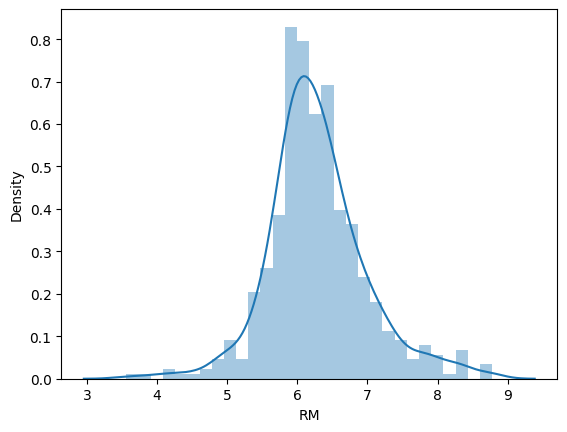

In [3]:
# histogram of the variable RM from the boston
# house price dataset from sklearn
# RM is the average number of rooms per dwelling
import seaborn as sns
sns.distplot(boston['RM'], bins=30)

QQ plots

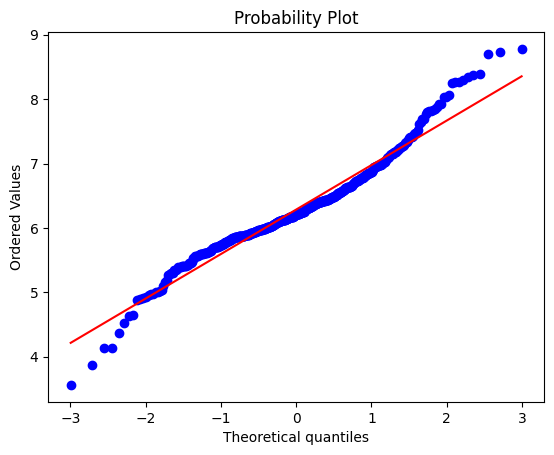

In [4]:
from scipy import stats
import matplotlib.pyplot as plt
stats.probplot(boston['RM'], dist="norm", plot=plt)
plt.show()

Chi-square distribution

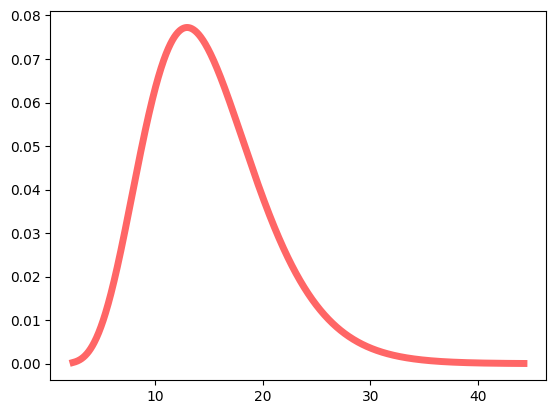

In [7]:
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
df = 15
x = np.linspace(chi2.ppf(0.0001, df), #ppf: percent point function (inverse of cumulative distribution function)
                chi2.ppf(0.9999, df), 1000) #returns 1000 numbers evenly spaced in [beg;end]
#print(x)
ax.plot(x, chi2.pdf(x, df), #pdf: probability density function
       'r-', lw=5, alpha=0.6, label='chi2 pdf')

Approach 1 : critical region

In [8]:
chi2.ppf(0.95, 5) #1-alpha, df

11.070497693516351

Approach 2 : p value

In [9]:
expected = [100,100,100,100,100,100]
observed = [50, 147,103,212,46,42]

In [10]:
import scipy.stats as stats

#perform Chi-Square Goodness of Fit Test
stats.chisquare(f_obs=observed, f_exp=expected)

Power_divergenceResult(statistic=235.42000000000002, pvalue=7.36720606760897e-49)

Kolmogorov Smirnov -> extension for continuous variables

In [ ]:
from numpy.random import seed
from numpy.random import poisson

#set seed (e.g. make this example reproducible)
seed(0)

#generate dataset of 100 values that follow a Poisson distribution with mean=5
data = poisson(5, 100)

from scipy.stats import kstest

#perform Kolmogorov-Smirnov test
kstest(data, 'norm')

KstestResult(statistic=0.9072498680518208, pvalue=1.0908062873170218e-103)

Contingency test

In [11]:
from scipy.stats import chi2_contingency
obs = np.array([[50,75],[125,175],[90,30],[45,10]])
test_statistic, pvalue, dof, expctd =chi2_contingency(obs)
pvalue

4.987377462630171e-14

Example 1

In [12]:
expected = [63,49,19,31]
observed = [162*0.4,162*0.35,162*0.15,162*0.1]
stats.chisquare(f_obs=observed, f_exp=expected)

Power_divergenceResult(statistic=9.805656075673053, pvalue=0.0202924640856341)

Example 2

In [14]:
from scipy.stats import norm
norm.cdf(167,loc=170,scale=5)-norm.cdf(165,loc=170,scale=5)

0.11559786381861653

In [15]:
from scipy.stats import norm
expected=[100*norm.cdf(165,loc=170,scale=5),100*(norm.cdf(167,loc=170,scale=5)-norm.cdf(165,loc=170,scale=5)),100*(norm.cdf(169,loc=170,scale=5)-norm.cdf(167,loc=170,scale=5)),100*(norm.cdf(171,loc=170,scale=5)-norm.cdf(169,loc=170,scale=5)),100*(norm.cdf(173,loc=170,scale=5)-norm.cdf(171,loc=170,scale=5)),100*(norm.cdf(175,loc=170,scale=5)-norm.cdf(173,loc=170,scale=5)),100*(1-norm.cdf(175,loc=170,scale=5))]
observed =[6 , 7 , 15 , 23 , 25 ,12 , 12]
stats.chisquare(f_obs=observed, f_exp=expected)

Power_divergenceResult(statistic=19.43802830649535, pvalue=0.0034844077678656974)

Example 3

NameError: name 'np' is not defined